# SUNNY DAY TRAINING SCHEDULE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn import datasets


In [2]:



#episode = 1000 #Number of days
hour = 24 #Number of time intervals in a day


#Solar parameters
A = 34 #Area of panel in meter square
seff = 0.16 #Solar panel efficiency in %
MaxSP = 5 #Maximum solar power in KW
NSP = 7 #Number of Solar panels

#Wind Parameters
vc = 3 #Cut-in velocity in m/s
vf = 25 #Cut-off velocity in m/s
vr = 12 #Rated speed in m/s
MaxWP = 5 #Maximum wind power in KW
NWP = 8 #Number of wind turbines


#Battery parameters
BLmax = 36 #Maximum energy level in KWh
BLmin = 7.2 #Minimum energy level in KWh
BLv = 18 #Initial energy level in KWh
Crate = 4 #Maximum charging rate in KWh
Drate = -4 #Maximum discharging rate in KWh

#load[nd][th]
#state[th]
#SI[nd][th]
#V[nd][th]
#Price[th]
NumberofStates = 100
NumberofActions = 3

State = np.zeros([NumberofStates], dtype=float)


action = [-1,0,1] # -1 for discharging, 0 for idle and 1 for charging
    
    



#for i in range(1,24):
#    print(state[i].SOC)

Q_values = np.random.randn(NumberofStates,NumberofActions)
#Q_values = np.zeros([NumberofStates,NumberofActions],dtype=float)
#print(Q_values)

In [3]:
data = pd.read_excel (r'C:\Users\USER\Desktop\Project\Cases1.xlsx',sheet_name= 'Sheet1') 
df = pd.DataFrame(data, columns= ['Load', 'SI','V'])
print(df)
df.iloc[:, 2].values 

    Load    SI     V
0   1.50   0.0  14.0
1   1.50   0.0  10.5
2   1.75   0.0   9.1
3   2.00   1.4   5.6
4   1.75   2.7   5.2
5   1.40  10.0   6.0
6   1.60  13.8   7.7
7   1.75  11.0   7.5
8   1.80  12.2   7.7
9   1.80  10.0   8.2
10  1.75  19.0   9.0
11  1.50  21.0   7.0
12  1.50  60.4   7.2
13  1.60  86.0  14.0
14  1.75  80.8  13.3
15  2.00  50.3  15.0
16  2.50  30.0  17.4
17  3.00  20.0  15.3
18  3.50   4.8  13.6
19  3.75   1.8  10.5
20  3.80   0.0   9.0
21  3.75   0.0   6.0
22  2.50   0.0   6.7
23  2.00   0.0  12.2


array([14. , 10.5,  9.1,  5.6,  5.2,  6. ,  7.7,  7.5,  7.7,  8.2,  9. ,
        7. ,  7.2, 14. , 13.3, 15. , 17.4, 15.3, 13.6, 10.5,  9. ,  6. ,
        6.7, 12.2])

In [4]:
def PV_Calc(SI,seff,A):
    Ps = NSP*seff*A*SI/1000
    return Ps

def Wind_Calc(v,vc,vr,vf):
    #MaxWP = 5
    #for x in range(24):
    
        if((vf <= v) or (vc >= v)):
            pw.append(0)
        if((vc<=v) and (v<=vr)):
            pw.append((MaxWP*(pow(v,3)-pow(vc,3))/(pow(vr,3)-pow(vc,3)))*NWP)
        if((vr<= v) and (v<=vf)):
            pw.append(MaxWP*NWP)
            
        

In [5]:
#load = [100][25]
#SI = [100][25]
#V = [100][25]
Price = []
#PV = [100][25]
#Wind = [100][25]
T = 30
pw=[]

Load = df.iloc[:, 0].values
SI = df.iloc[:, 1].values
v = df.iloc[:, 2].values
Price=5
#for i in range(0,25):
 #   Price.append(random.randint(3,12))
Wind=[]
PV = PV_Calc(SI,seff,A) 
for x in range(24):
    Wind.append(Wind_Calc(v[x],vc,vr,vf))
    
Wind=pw    
    
    

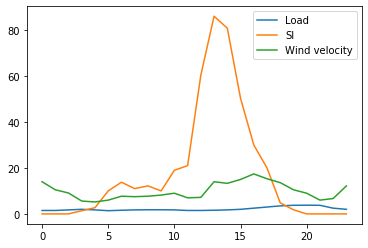

[1.5  1.5  1.75 2.   1.75 1.4  1.6  1.75 1.8  1.8  1.75 1.5  1.5  1.6
 1.75 2.   2.5  3.   3.5  3.75 3.8  3.75 2.5  2.  ]
[40, 26.58730158730159, 17.085737801293355, 3.4947912992357426, 2.6715579071134625, 4.444444444444445, 10.10071722516167, 9.285714285714286, 10.10071722516167, 12.330817166372718, 16.50793650793651, 7.430922986478542, 8.142222222222223, 40, 40, 40, 40, 40, 40, 26.58730158730159, 16.50793650793651, 4.444444444444445, 6.437695473251029, 40]


In [6]:
plt.plot(Load, label='Load')
plt.plot(SI, label='SI')
plt.plot(v, label='Wind velocity')
plt.legend()
plt.show()
print(Load)
print(Wind)

In [7]:
def state_transition(CurrentState,action):
    deltat = 1
    
    
    if(action == 1):
        CurrentState = CurrentState + deltat*Crate
    if(action == -1):
        CurrentState = CurrentState + deltat*Drate
    if(action == 0):
        CurrentState = CurrentState
    return CurrentState

In [8]:

state_transition(18,1)

22

In [9]:
def Reward(CurrentState,action,NextState,hour):
    reward = 0
    if action == 1:
        if NextState >= BLmax:
            reward = -10
        else:
            reward = -State[NextState]*Price
    elif action == 0:
        reward = 0
    elif action == -1:
        if NextState <= BLmin:
            reward = -10
        else:
            reward = State[NextState]*Price
    return reward

In [10]:
def select_epsilon_greedy_action(epsilon, CurrentState):
    result = np.random.uniform()
    action = [-1,1,0]
    if result < epsilon:
        return np.random.choice(action) # Random action (Up,Down,left,right)
    else:
        x = np.argmax(Q_values[CurrentState]) # Greedy action for state
        if(x == 0):
            return -1 #Discharging
        elif(x == 1):
            return 0 #Idle
        elif(x == 2):
            return 1 #Charging

In [11]:
def PGCalc(NextState,day,hour,action):
    u = action*4
    State[NextState] = Load[hour]-PV[hour]-Wind[hour] + u

In [12]:
num_episodes = 1000
epsilon = 0.2
discount = 0.9 # Discount Factor is set here

for episode in range(num_episodes):
    #initial_state = 0 # STarting state is specified here
    #state = initial_state
    CurrentState = 18
    #print("Episode Begins",episode)
    
    for hour in range(0,24): # Run until the end of the episode
        
        
        #next_state = 37
        # Select action
    
        action = select_epsilon_greedy_action(epsilon, CurrentState)
        NextState = state_transition(CurrentState,action)
        PGCalc(NextState,episode,hour,action)
        reward= Reward(CurrentState,action,NextState,hour) 
           
            
        # Improve Q-values with Bellman Equation
        if hour == 24:
            Q_values[CurrentState][action] = reward
        else:
            Q_values[CurrentState][action] = reward + discount * max(Q_values[NextState])
        CurrentState = NextState
    
    #print("Episode Ends",episode)

print('Q-values are:')
print(Q_values)
action_dict = {0:'Discharge', 1:'Idle',2:'Charge'}
state = 1
for Q_vals in Q_values:
    if state==1:
        print('Best action for state 1 is Charge')
    elif state==100:
        print('Best action for state 100 is Idle')
    else:
        print('Best action for state {} is {}'.format(state, 
                                             action_dict[np.argmax(Q_vals)]))
    state += 1

Q-values are:
[[-1.37506268e+00  4.04710705e-01 -2.02363214e-01]
 [-4.69937094e-01  8.90374667e-01 -3.92005222e-01]
 [ 9.03930842e+02  1.00436760e+03  9.55464958e+02]
 [ 1.62645288e-01 -5.33386950e-01 -1.45234902e+00]
 [-3.72953883e-01 -7.91610050e-01 -6.36408803e-01]
 [ 9.44437351e-01  7.01398352e-03  3.82676281e-01]
 [ 8.64926972e+02  9.61029969e+02  8.93930842e+02]
 [-1.07551760e+00  2.34320480e-01 -5.46606301e-01]
 [ 1.13253390e+00  4.31278303e-01 -2.20539487e+00]
 [ 1.02995532e-01  3.75304912e-01 -2.85359645e-01]
 [ 7.69434275e+02  8.34316209e+02  8.54926972e+02]
 [-6.16252109e-01 -4.19911445e-01  1.57629736e-02]
 [-6.21847522e-01 -2.67906061e-01 -3.12823772e-01]
 [ 1.83215926e+00  1.72769572e+00 -3.49012840e-01]
 [ 6.47681889e+02  7.19646543e+02  5.41059875e+02]
 [-8.85103659e-03 -1.51049862e+00  5.91959547e-01]
 [ 7.35343897e-01 -4.13721495e-02  8.36279772e-01]
 [ 1.12704589e+00  4.53783630e-02 -7.80450477e-01]
 [ 6.76106861e+02  6.68291953e+02  6.44509831e+02]
 [ 3.21722687e-02